# The benefit of visualizing a causal graph
- You can clearly see the relation of variables and kind of variable for example chains, fork and collider.
- You also understand which variable you should controll.

### reference
- https://ylearn.readthedocs.io/en/latest/sub/causal_model/graph.html

In [1]:
!pip install -r requirements.txt

# first step visualizing causal graph

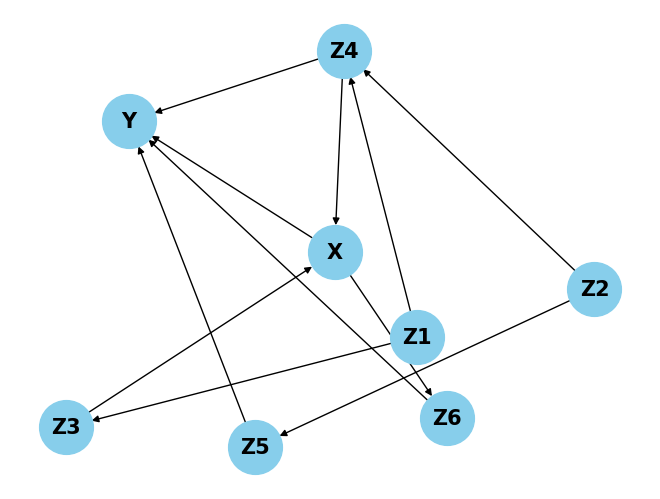

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# X is cause, Y is outcome, Z are
causation = {
    'Z1': [],
    'Z2': [],
    'Z3': ['Z1'],
    'Z4': ['Z1', 'Z2'],
    'Z5': ['Z2'],
    'Z6': ['X'],
    'X': ['Z3', 'Z4'],
    'Y': ['Z6', 'Z4', 'Z5', 'X'],
}

# Create directed graph
G = nx.DiGraph()

# Add nodes
for node in causation.keys():
    G.add_node(node)

# Add edges based on causation
for target, sources in causation.items():
    for source in sources:
        G.add_edge(source, target)

# Draw the graph
pos = nx.spring_layout(G, seed=428)
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_color='skyblue', font_weight='bold', node_size=1500, font_size=15)
plt.show()

# judge which variables we should controll under the backdoor-rule

In [3]:
from ylearn.causal_model.graph import CausalGraph
from ylearn.causal_model.model import CausalModel

/Users/haru/opt/anaconda3/envs/causal_inference/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
cg = CausalGraph(causation=causation)
cm = CausalModel(causal_graph=cg)
# you can get backdoor variable and forntdoor variable too
backdoor_set, prob = cm.identify(treatment={'X'}, outcome={'Y'}, identify_method=('backdoor', 'simple'))['backdoor']

print(backdoor_set)

['Z3', 'Z4']
